In [1]:
%load_ext autoreload
%autoreload 1
%aimport script

import pandas as pd
import numpy as np
from time import time
from matplotlib import pyplot as plt

# Example of using k-means method

We will show how to use our script. First we have to load dataset (here consisting various information about adults).

1. The task is to determine whether or not person earns more than 50K a year.
2. We will compare obtained results with dataset authors best and worst algorithm.
3. Three different measures will be compared.

In [2]:
data = pd.read_csv('data/adult.data', delimiter=',', header=None)
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Implemented measures/distances are as follows:
* method - one of ['sorted', 'hamming', 'gower']
* mode_nominal - one of [True, False]

Where *method* follows one of three implemented measures, while *mode_nominal* mean that we will use mode rather than mean for finding center of clusters for nominal data.


In [3]:
# set fixed value seed for reproduce
np.random.seed(0)
clusters, idx = script.k_means(data,
                               numerical=[0,2,4,10,11,12], nominal=[1,3,5,6,7,8,9,13],
                               K=2, iters=10, method='gower', mode_nominal=False)

# here we set 15th column with prediction of k-mean method
data[15] = idx[-1]

# some calculations to obtain accuracy
data[15] = data[15].replace(dict(zip([0,1], data[14].unique())))
accuracy = (data[14]==data[15]).sum()/data.shape[0]
accuracy = np.max([accuracy, 1-accuracy])

#print accuracy
print(f'Accuracy of Gower distance = {100*accuracy:.2f} %')

Accuracy of Gower distance = 73.48 %


### Here we use mode instead mean for nominal data

In [4]:
# set fixed value seed for reproduce
np.random.seed(0)
clusters, idx = script.k_means(data,
                               numerical=[0,2,4,10,11,12], nominal=[1,3,5,6,7,8,9,13],
                               K=2, iters=10, method='gower', mode_nominal=True)

# here we set 15th column with prediction of k-mean method
data[15] = idx[-1]

# some calculations to obtain accuracy
data[15] = data[15].replace(dict(zip([0,1], data[14].unique())))
accuracy = (data[14]==data[15]).sum()/data.shape[0]
accuracy = np.max([accuracy, 1-accuracy])

#print accuracy
print(f'Accuracy of Gower distance (with mode instead of mean for nominal data)= {100*accuracy:.2f} %')

Accuracy of Gower distance (with mode instead of mean for nominal data)= 61.46 %


## One can also set custom measures.
See example below, where we specify distance function as logarithm for numerical data and hamming for nominal data

In [5]:
# set fixed value seed for reproduce
np.random.seed(0)
clusters, idx = script.k_means(data,
                               numerical=[0,2,4,10,11,12], nominal=[1,3,5,6,7,8,9,13],
                               K=2, iters=10, mode_nominal=False, 
                               distance_function_num = lambda x, y: np.log(1+np.abs((x-y))), 
                               distance_function_nom = lambda x, y: x!=y)

# here we set 15th column with prediction of k-mean method
data[15] = idx[-1]

# some calculations to obtain accuracy
data[15] = data[15].replace(dict(zip([0,1], data[14].unique())))
accuracy = (data[14]==data[15]).sum()/data.shape[0]
accuracy = np.max([accuracy, 1-accuracy])

#print accuracy
print(f'Accuracy for log(1+|x-y|) numerical distance and x!=y nominal distance = {100*accuracy:.2f} %')

Applying custom distance function
Accuracy for log(1+|x-y|) numerical distance and x!=y nominal distance = 78.22 %


## Comparision
Here we compare different measures in k-mean algorithm.

We will present results using box-plots, alongside of best and worst algorithms used by the autors of given dataset (numbers were provided in .info file).

In [6]:
# set fixed value seed for reproduce
np.random.seed(0)
accuracies1 = []
for _ in range(100):
    clusters, idx = script.k_means(data,
                                   numerical=[0,2,4,10,11,12], nominal=[1,3,5,6,7,8,9,13],
                                   K=2, iters=10, method='sorted')
    data[15] = idx[-1]
    data[15] = data[15].replace(dict(zip([0,1], data[14].unique())))
    accuracy = (data[14]==data[15]).sum()/data.shape[0]
    accuracy = np.max([accuracy, 1-accuracy])
    accuracies1 += [accuracy]

# print first five of accuracies
print(accuracies1[:5])

[0.6176100242621541, 0.6120819385154019, 0.6105463591413041, 0.6206811830103498, 0.6147845582138141]


In [7]:
# set fixed value seed for reproduce
np.random.seed(0)
accuracies2 = []
for _ in range(100):
    clusters, idx = script.k_means(data,
                                   numerical=[0,2,4,10,11,12], nominal=[1,3,5,6,7,8,9,13],
                                   K=2, iters=10, method='hamming')
    data[15] = idx[-1]
    data[15] = data[15].replace(dict(zip([0,1], data[14].unique())))
    accuracy = (data[14]==data[15]).sum()/data.shape[0]
    accuracy = np.max([accuracy, 1-accuracy])
    accuracies2 += [accuracy]

# print first five of accuracies
print(accuracies2[:5])

[0.6176100242621541, 0.6120819385154019, 0.6105463591413041, 0.6206811830103498, 0.6147845582138141]


In [8]:
# set fixed value seed for reproduce
np.random.seed(0)
accuracies3 = []
for _ in range(100):
    clusters, idx = script.k_means(data,
                                   numerical=[0,2,4,10,11,12], nominal=[1,3,5,6,7,8,9,13],
                                   K=2, iters=10, method='gower', mode_nominal=False)
    data[15] = idx[-1]
    data[15] = data[15].replace(dict(zip([0,1], data[14].unique())))
    accuracy = (data[14]==data[15]).sum()/data.shape[0]
    accuracy = np.max([accuracy, 1-accuracy])
    accuracies3 += [accuracy]

# print first five of accuracies
print(accuracies3[:5])

[0.7348361536807838, 0.658333589263229, 0.6653051196216333, 0.7348054420933018, 0.7348361536807838]


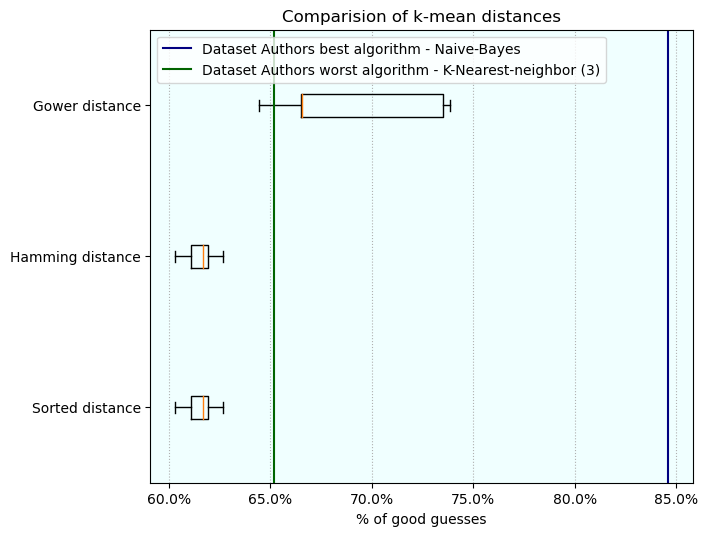

In [9]:
import matplotlib.ticker as mtick
fig, ax = plt.subplots(figsize=(7,6), dpi=100)


ax.boxplot(100*np.array(accuracies1), vert=False, positions=[1])
ax.boxplot(100*np.array(accuracies2), vert=False, positions=[2])
ax.boxplot(100*np.array(accuracies3), vert=False, positions=[3])

ax.set_title(f'Comparision of k-mean distances')
ax.set_xlabel('% of good guesses')
ax.set_yticklabels(['Sorted distance', 'Hamming distance', 'Gower distance'])
ax.grid(ls=':', axis='x')
ax.set_facecolor('azure')

ax.axvline(100-15.4, color='navy', label='Dataset Authors best algorithm - Naive-Bayes')
ax.axvline(100-34.8, color='darkgreen', label='Dataset Authors worst algorithm - K-Nearest-neighbor (3)')
ax.xaxis.set_major_formatter(mtick.PercentFormatter())

ax.legend()
plt.savefig("plots/comparision_adults.pdf", transparent=True, bbox_inches='tight')
plt.show()